In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')

In [4]:
df.tail()


,Unnamed: 0,id,time,variable,value
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033
376911,2784435,AS14.32,2014-04-07 18:25:14.036,appCat.weather,22.431


In [9]:
print(df["id"].unique())
#(df["id"].hist())

dfm = df.as_matrix()
print(dfm)
# for each user
# For each record, get the timestamp and the variable+value
# Each timestamp,var,val triple is one row

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
[[1 'AS14.01' '2014-02-26 13:00:00.000' 'mood' 6.0]
 [2 'AS14.01' '2014-02-26 15:00:00.000' 'mood' 6.0]
 [3 'AS14.01' '2014-02-26 18:00:00.000' 'mood' 6.0]
 ...
 [2774026 'AS14.30' '2014-04-26 10:19:07.434' 'appCat.weather' 7.026]
 [2774133 'AS14.30' '2014-04-27 00:44:48.450' 'appCat.weather' 23.033]
 [2784435 'AS14.32' '2014-04-07 18:25:14.036' 'appCat.weather'
  22.430999999999997]]


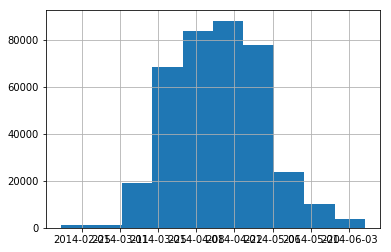

In [37]:
dfT = df["time"].apply(pd.Timestamp)
dfT.hist()

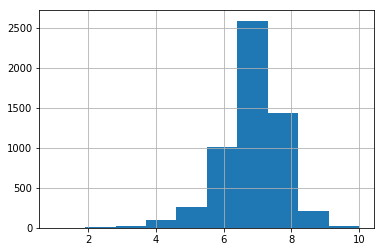

In [28]:
df[df.variable=="mood"]["value"].hist()

In [66]:
# all users
users = list(df.id.unique())

# get all days a user was active (for averaging mood per day)
user0 = df[df.id == users[0]]
days = sorted(set([x.split()[0] for x in list(user0['time'])]))

pd.set_option('display.max_columns', 50)

day = days[0]
print(user0[user0['time'].str.contains(day)])

#TODO only select days on which a user's mood is known

        Unnamed: 0       id                     time variable  value
136470      136471  AS14.01  2014-02-17 12:04:42.394     call    1.0
136471      136472  AS14.01  2014-02-17 18:28:25.520     call    1.0
        Unnamed: 0       id                     time              variable  \
16927        16928  AS14.01  2014-03-20 22:00:00.000              activity   
16928        16929  AS14.01  2014-03-20 23:00:00.000              activity   
39892        39893  AS14.01  2014-03-20 23:14:58.200                screen   
39893        39894  AS14.01  2014-03-20 23:17:23.092                screen   
39894        39895  AS14.01  2014-03-20 23:20:43.698                screen   
39895        39896  AS14.01  2014-03-20 23:22:05.476                screen   
39896        39897  AS14.01  2014-03-20 23:31:08.088                screen   
39897        39898  AS14.01  2014-03-20 23:45:31.217                screen   
39898        39899  AS14.01  2014-03-20 23:48:14.392                screen   
39899        